# Import

In [156]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import src.workfile_functions as wf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to new lines

In [6]:
df = pd.read_csv('../data/RR2/diabetic_data.csv')

In [7]:
ids = pd.read_csv('../data/RR2/IDS_mapping.csv',header=None)

In [8]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
# this is a weird table with 3 tables in it
ids.head()

,0,1
0,admission_type_id,description
1,1,Emergency
2,2,Urgent
3,3,Elective
4,4,Newborn


In [10]:
len(ids)

68

## Readmission (target $y$)

In [11]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

#### Checkpoint 1

In [12]:
# checkpoint 1
# df_copy_1 = wf.checkpoint(df, existing_copy=globals().get('df_copy_1'))

In [13]:
# df = df_copy_1.copy(deep=True)

In [14]:
# create a binary 0-1 for early readmittance
df['readmit_early'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# create a binary 0-1 for any readmittance
df['readmit_at_all'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

In [15]:
df[['readmit_early','readmit_at_all']].value_counts()

readmit_early  readmit_at_all
0              0                 54864
               1                 35545
1              1                 11357
Name: count, dtype: int64

In [16]:
df.drop('readmitted',axis=1,inplace=True)

In [17]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmit_early,readmit_at_all
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0


# Data Cleaning

## NULLS

In [18]:
# count instances of '?' which is this data's version of NULL
wf.count_values(df,'?')

Column                                 ? Count    % of Rows
------------------------------------------------------------
weight                                  98,569       96.86%
medical_specialty                       49,949       49.08%
payer_code                              40,256       39.56%
race                                     2,273        2.23%
diag_3                                   1,423        1.40%
diag_2                                     358        0.35%
diag_1                                      21        0.02%


In [19]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [20]:
df = df[(df['race']!='?')]

In [21]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [22]:
df['gender'].value_counts()

gender
Female             53575
Male               45917
Unknown/Invalid        1
Name: count, dtype: int64

In [23]:
df = df[(df['gender']!='Unknown/Invalid')]
df['gender'].value_counts()

gender
Female    53575
Male      45917
Name: count, dtype: int64

#### Checkpoint 2

In [24]:
# checkpoint 2
# df_copy_2 = wf.checkpoint(df, existing_copy=globals().get('df_copy_2'))

In [25]:
#df = df_copy_2.copy(deep=True)

In [26]:
wf.count_values(df,'?')

Column                                 ? Count    % of Rows
------------------------------------------------------------
weight                                  96,433       96.93%
medical_specialty                       48,766       49.01%
payer_code                              39,711       39.91%
diag_3                                   1,349        1.36%
diag_2                                     336        0.34%
diag_1                                      19        0.02%


In [27]:
# small ones first
df = df[(df['diag_1']!='?')&(df['diag_2']!='?')&(df['diag_3']!='?')]
len(df)

98052

In [28]:
# let's remove any NULLs from payer_code
df = df[(df['payer_code']!='?')]
len(df)

59129

In [29]:
# Example usage:
wf.count_values(df,'?')

Column                                 ? Count    % of Rows
------------------------------------------------------------
weight                                  56,909       96.25%
medical_specialty                       32,374       54.75%


In [30]:
len(df[df['medical_specialty']!='?'])

26755

In [31]:
len(df[df['weight']!='?'])

2220

I think it's reasonable to drop the `weight` column entirely while imputing NULL-ness on the `medical_specialty` column.

In [32]:
df.drop('weight',axis=1,inplace=True)

In [33]:
df['medical_specialty'] = df['medical_specialty'].replace('?', 'Unknown')

In [34]:
df['medical_specialty'].value_counts().head(5)

medical_specialty
Unknown                   32374
Emergency/Trauma           6987
InternalMedicine           5904
Family/GeneralPractice     3146
Cardiology                 2313
Name: count, dtype: int64

In [35]:
df['medical_specialty'] = df['medical_specialty'].replace('PhysicianNotFound', 'Unknown')

In [36]:
for col in ['race', 'medical_specialty', 'payer_code']:
    df = wf.group_rare_categories(df, column=col, threshold=1000)

In [37]:
df['race'].value_counts()

race
Caucasian          47072
AfricanAmerican     9842
Other               1196
Hispanic            1019
Name: count, dtype: int64

In [38]:
df['medical_specialty'].value_counts()

medical_specialty
Unknown                   32378
Emergency/Trauma           6987
InternalMedicine           5904
Other                      5527
Family/GeneralPractice     3146
Cardiology                 2313
Surgery-General            1835
Radiologist                1039
Name: count, dtype: int64

In [39]:
df['payer_code'].value_counts()

payer_code
MC       31404
HM        6058
SP        4653
BC        4462
MD        3382
CP        2431
UN        2219
CM        1914
Other     1593
OG        1013
Name: count, dtype: int64

In [40]:
# NULL check
wf.count_nulls(df)

Column                              NULL Count    % of Rows
------------------------------------------------------------
max_glu_serum                           57,241       96.81%
A1Cresult                               49,468       83.66%


## Medicines

#### Checkpoint 3

In [41]:
# checkpoint 3
# df_copy_3 = wf.checkpoint(df, existing_copy=globals().get('df_copy_7'))

In [42]:
#df = df_copy_3.copy(deep=True)

Although we could use *all* medicines in this study, let's restrict to whether there is a medicine and whether it's been changed.

In [43]:
# lots of medicines
df.iloc[:,23:46]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
20446,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,No,No
20737,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No
20824,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
21083,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No
23668,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Down,No,No,No,No,No
101761,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No
101762,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No
101763,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No


In [44]:
meds = df.columns[23:46].to_list()

In [45]:
df.drop(meds,axis=1,inplace=True)

In [46]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmit_early,readmit_at_all
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,NaN,NaN,Ch,Yes,0,0
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,V56,403,599,6,NaN,NaN,No,Yes,0,0
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,NaN,NaN,No,Yes,0,0


### A1C Result

`>7` or `>8` indicates high A1C

In [47]:
df['A1Cresult'].value_counts()

A1Cresult
>8      4146
Norm    3146
>7      2369
Name: count, dtype: int64

In [48]:
df['high_a1c'] = df['A1Cresult'].isin(['>7','>8']).astype(int)

### Max Glucose Serum

`>200` or `>300` indicate high glucose

In [49]:
df['max_glu_serum'].value_counts()

max_glu_serum
Norm    922
>300    506
>200    460
Name: count, dtype: int64

In [50]:
df['glucose_high'] = df['max_glu_serum'].isin(['>200', '>300']).astype(int)

In [51]:
cols = ['A1Cresult','max_glu_serum']

In [52]:
df.drop(cols,axis=1,inplace=True)

In [53]:
df.shape

(59129, 27)

## Encoding

#### Checkpoint 4

In [54]:
# checkpoint 4
# df_copy_4 = wf.checkpoint(df, existing_copy=globals().get('df_copy_7'))

In [55]:
# df = df_copy_4.copy(deep=True)

In [56]:
df['change'].value_counts()

change
Ch    30249
No    28880
Name: count, dtype: int64

In [57]:
df = wf.binary_labeler(data=df, data_cols=['change'], one_var='Ch', zero_var='No')

In [58]:
df['change_bin'].value_counts()

change_bin
1    30249
0    28880
Name: count, dtype: int64

In [59]:
df['diabetesMed'].value_counts()

diabetesMed
Yes    46960
No     12169
Name: count, dtype: int64

In [60]:
df = wf.binary_labeler(data=df,data_cols=['diabetesMed'], one_var='Yes', zero_var='No')

In [61]:
df['diabetesMed_bin'].value_counts()

diabetesMed_bin
1    46960
0    12169
Name: count, dtype: int64

In [62]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmit_early,readmit_at_all,high_a1c,glucose_high,change_bin,diabetesMed_bin
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,Ch,Yes,0,0,0,0,1,1
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,V56,403,599,6,No,Yes,0,0,0,0,0,1
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,No,Yes,0,0,0,0,0,1
21083,73731852,20542797,Caucasian,Male,[70-80),1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,Ch,Yes,0,0,0,0,1,1
23668,80820942,20514150,Caucasian,Female,[60-70),2,1,1,4,MC,Unknown,33,0,11,0,0,0,250.02,428,401,4,Ch,Yes,1,1,0,0,1,1


In [63]:
df = wf.binary_labeler(data=df,data_cols=['gender'],one_var='Female',zero_var='Male')

In [64]:
df['gender_bin'].value_counts()

gender_bin
1    31922
0    27207
Name: count, dtype: int64

In [65]:
df.diag_1.value_counts(dropna=False)

diag_1
428    3894
414    3000
486    2193
786    2120
410    1858
       ... 
98        1
990       1
746       1
381       1
147       1
Name: count, Length: 656, dtype: int64

In [66]:
df.diag_1.value_counts(dropna=False)[150]

np.int64(54)

In [67]:
df.diag_2.value_counts(dropna=False)

diag_2
276       4286
428       3636
250       3083
427       3032
401       2045
          ... 
474          1
250.91       1
843          1
320          1
927          1
Name: count, Length: 695, dtype: int64

In [68]:
df.diag_3.value_counts(dropna=False)

diag_3
250    6460
401    4612
276    3410
428    2664
427    2356
       ... 
14        1
750       1
370       1
671       1
971       1
Name: count, Length: 730, dtype: int64

In [69]:
df.diag_1.isna().sum()

np.int64(0)

In [70]:
df.diag_2.isna().sum()

np.int64(0)

In [71]:
df.diag_3.isna().sum()

np.int64(0)

In [72]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df = wf.group_rare_categories(df, column=col, threshold=100)

In [73]:
df.diag_1.value_counts(dropna=False)

diag_1
Other    9425
428      3894
414      3000
486      2193
786      2120
         ... 
540       105
821       104
721       104
411       102
444       100
Name: count, Length: 96, dtype: int64

In [74]:
df.diag_2.value_counts(dropna=False)

diag_2
Other    8802
276      4286
428      3636
250      3083
427      3032
         ... 
396       106
458       104
728       103
348       102
492       101
Name: count, Length: 94, dtype: int64

In [75]:
df.diag_3.value_counts(dropna=False)

diag_3
Other     9041
250       6460
401       4612
276       3410
428       2664
          ... 
V42        109
410        108
453        108
250.92     102
715        100
Name: count, Length: 97, dtype: int64

In [76]:
cols = ['change','diabetesMed','gender']

In [77]:
df.drop(cols,axis=1,inplace=True)

In [78]:
df.head()

,encounter_id,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change_bin,diabetesMed_bin,gender_bin
20446,72091308,20123568,Caucasian,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1
20737,72848634,20377854,Caucasian,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1
20824,73062156,20408121,Caucasian,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1
21083,73731852,20542797,Caucasian,[70-80),1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,0,0,0,0,1,1,0
23668,80820942,20514150,Caucasian,[60-70),2,1,1,4,MC,Unknown,33,0,11,0,0,0,250.02,428,401,4,1,1,0,0,1,1,1


In [79]:
df.rename({'change_bin':'change','diabetesMed_bin':'on_meds','gender_bin':'gender'},axis=1,inplace=True)

# EDA

#### Checkpoint 5

In [118]:
# checkpoint 5
# df_copy_5 = wf.checkpoint(df, existing_copy=globals().get('df_copy_5'))

In [119]:
# df = df_copy_5.copy(deep=True)

## Repeat Patients

How often does a patient repeatedly visit?

In [120]:
df['patient_nbr'].value_counts()

patient_nbr
23460264    3
42908625    3
38049066    3
99186975    3
44051940    3
           ..
52005600    1
25282791    1
94219614    1
43747200    1
23863752    1
Name: count, Length: 37705, dtype: int64

In [ ]:
len(df)/df['encounter_id'].nunique()

In [ ]:
df.drop('encounter_id',axis=1,inplace=True)

In [ ]:
df.head(3)

,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender
20446,20123568,Caucasian,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1
20737,20377854,Caucasian,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1
20824,20408121,Caucasian,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1


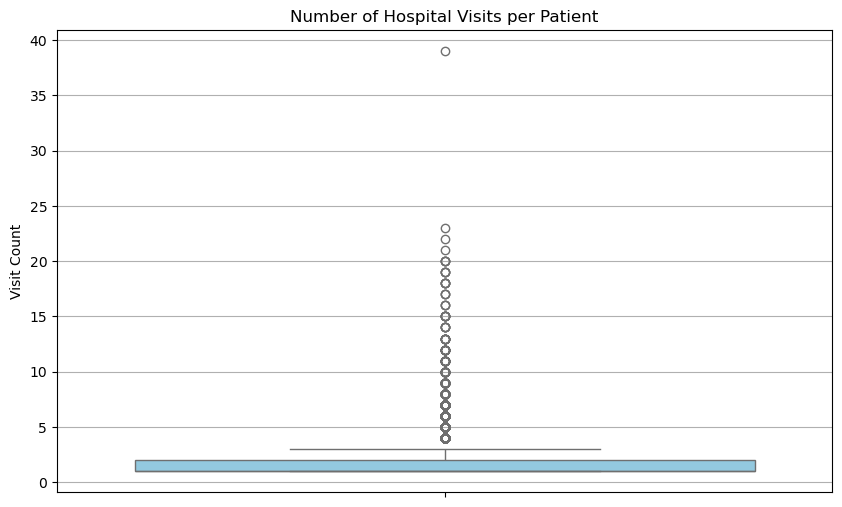

Q1 (25th percentile): 1.0
Q3 (75th percentile): 2.0
IQR (Interquartile Range): 1.0


In [ ]:
# Step 1: Count visits per patient
patient_visits = df['patient_nbr'].value_counts()

# Step 2: Convert to a DataFrame for analysis
visit_df = pd.DataFrame({'patient_nbr': patient_visits.index, 'visit_count': patient_visits.values})

# Step 3: Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=visit_df['visit_count'], color='skyblue')
plt.title('Number of Hospital Visits per Patient')
plt.ylabel('Visit Count')
plt.grid(True, axis='y')
plt.show()

# Step 4: Calculate IQR (Interquartile Range)
Q1 = visit_df['visit_count'].quantile(0.25)
Q3 = visit_df['visit_count'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

In [ ]:
visit_df['visit_count'].mean()

np.float64(1.4884206816694356)

Mean and Median are pretty close, but we see *generally* most patients only visit the hospital 1-2 times.

In [ ]:
# first checking if they would have multiple visits without readmission, which yes, but not always
df[df['patient_nbr'].isin(visit_df[(visit_df['visit_count']>1)]['patient_nbr'])]['readmit_at_all'].value_counts()

readmit_at_all
1    22248
0     7496
Name: count, dtype: int64

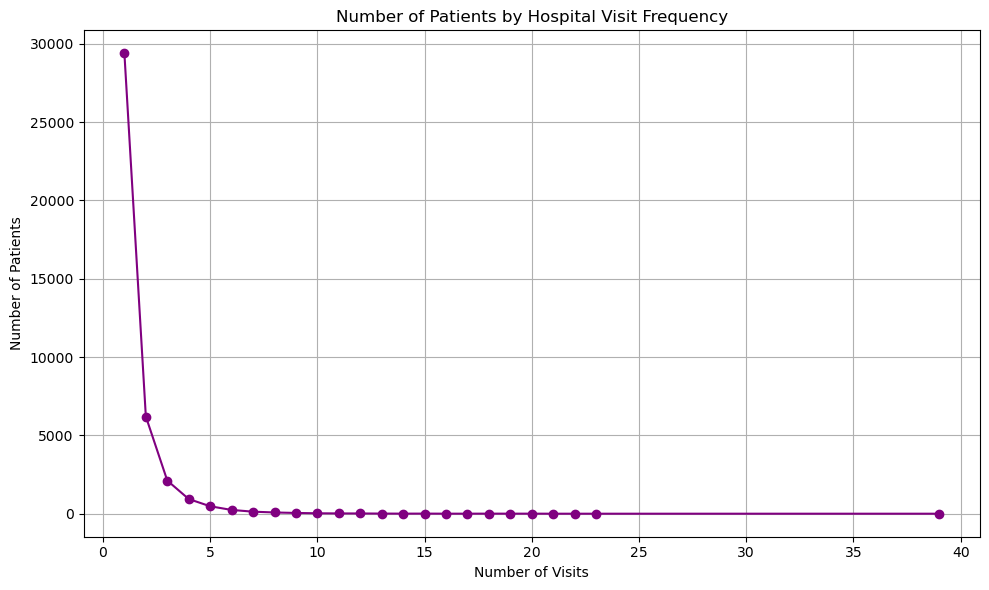

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Count visits per patient
patient_visits = df['patient_nbr'].value_counts()

# Step 2: Count how many patients had 1, 2, 3... visits
visit_distribution = patient_visits.value_counts().sort_index()

# Step 3: Plot it
plt.figure(figsize=(10, 6))
plt.plot(visit_distribution.index, visit_distribution.values, marker='o', color='purple')
plt.title('Number of Patients by Hospital Visit Frequency')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
visit_df['visit_count'].value_counts()

visit_count
1     29385
2      6205
3      2115
4       938
5       476
6       241
7       131
8        80
9        49
10       27
11       19
12       16
13        9
15        7
14        5
18        5
20        4
19        4
17        3
16        3
39        1
23        1
22        1
21        1
Name: count, dtype: int64

In [ ]:
df[(df['patient_nbr'].isin(visit_df[visit_df['visit_count']==3]['patient_nbr'].sample(1)))]

,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender
46170,28199475,Caucasian,[80-90),5,3,1,4,MC,Unknown,34,0,19,0,0,0,250.8,780,Other,9,0,1,0,0,1,1,0
91890,28199475,Caucasian,[80-90),1,3,7,3,MC,Unknown,57,0,22,0,0,0,Other,Other,Other,9,0,1,1,0,1,1,0
99767,28199475,Caucasian,[80-90),1,3,7,4,MC,Unknown,56,0,17,0,0,1,410,428,584,9,0,1,0,0,1,1,0


In [ ]:
df = df[(df['patient_nbr'].isin(visit_df[visit_df['visit_count']<=3]['patient_nbr']))]

In [ ]:
visit_df[visit_df['visit_count']<=3]['visit_count'].value_counts()

visit_count
1    29385
2     6205
3     2115
Name: count, dtype: int64

In [ ]:
len(df)

48140

In [ ]:
df.head()

,patient_nbr,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender
20446,20123568,Caucasian,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1
20737,20377854,Caucasian,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1
20824,20408121,Caucasian,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1
21083,20542797,Caucasian,[70-80),1,2,7,10,MC,InternalMedicine,68,1,18,0,0,0,682,427,276,6,0,0,0,0,1,1,0
23668,20514150,Caucasian,[60-70),2,1,1,4,MC,Unknown,33,0,11,0,0,0,250.02,428,401,4,1,1,0,0,1,1,1


Because of how patient visits are, when the time comes for train-test-split, I will do it on `patient_nbr` rather than arbitrary rows, so the same patient doesn't end up in both the training and test data.

## Age

In [ ]:
# checkpoint 6
# df_copy_6 = wf.checkpoint(df, existing_copy=globals().get('df_copy_6'))

In [ ]:
# df = df_copy_6_copy(deep=True)

Encoding age as an ordinal feature

In [ ]:
df['age'].value_counts()

age
[70-80)     12416
[60-70)     10590
[80-90)      8927
[50-60)      7898
[40-50)      4296
[90-100)     1609
[30-40)      1555
[20-30)       676
[10-20)       167
[0-10)          6
Name: count, dtype: int64

In [ ]:
age_map = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}

df.loc[:, 'age_ord'] = df['age'].map(age_map)

In [ ]:
df.drop('age',axis=1,inplace=True)

In [ ]:
df.head(3)

,patient_nbr,race,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender,age_ord
20446,20123568,Caucasian,1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1,7
20737,20377854,Caucasian,2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1,6
20824,20408121,Caucasian,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1,9


## Race

In [ ]:
# checkpoint 7
# df_copy_7 = wf.checkpoint(df, existing_copy=globals().get('df_copy_7'))

In [ ]:
# df = df_copy_7.copy(deep=True)

In [ ]:
df = pd.get_dummies(df, columns=['race'])

In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
df.head(3)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender,age_ord,race_AfricanAmerican,race_Caucasian,race_Hispanic,race_Other
0,20123568,1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1,7,False,True,False,False
1,20377854,2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1,6,False,True,False,False
2,20408121,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1,9,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48140 entries, 0 to 48139
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               48140 non-null  int64 
 1   admission_type_id         48140 non-null  int64 
 2   discharge_disposition_id  48140 non-null  int64 
 3   admission_source_id       48140 non-null  int64 
 4   time_in_hospital          48140 non-null  int64 
 5   payer_code                48140 non-null  object
 6   medical_specialty         48140 non-null  object
 7   num_lab_procedures        48140 non-null  int64 
 8   num_procedures            48140 non-null  int64 
 9   num_medications           48140 non-null  int64 
 10  number_outpatient         48140 non-null  int64 
 11  number_emergency          48140 non-null  int64 
 12  number_inpatient          48140 non-null  int64 
 13  diag_1                    48140 non-null  object
 14  diag_2                

In [139]:
race_cols = [col for col in df.columns if col.startswith("race_")]
df[race_cols] = df[race_cols].astype(int)

# Features for modeling

In [ ]:
# checkpoint 8
# df_copy_8 = wf.checkpoint(df, existing_copy=globals().get('df_copy_8'))


Do you want to save a copy of the DataFrame?
DF Saved.


In [ ]:
# df = df_copy_8.copy(deep=True)

In [108]:
df.head(3)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender,age_ord,race_AfricanAmerican,race_Caucasian,race_Hispanic,race_Other
0,20123568,1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,0,0,0,0,1,1,1,7,False,True,False,False
1,20377854,2,1,1,3,MC,Other,59,3,11,0,0,0,Other,403,599,6,0,0,0,0,0,1,1,6,False,True,False,False
2,20408121,1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,0,0,0,0,0,1,1,9,False,True,False,False


## Target Class Imbalance

In [109]:
y1 = df['readmit_early']
y2 = df['readmit_at_all']

In [112]:
y1.value_counts(normalize=True)

readmit_early
0    0.922019
1    0.077981
Name: proportion, dtype: float64

In [113]:
y2.value_counts(normalize=True)

readmit_at_all
0    0.626485
1    0.373515
Name: proportion, dtype: float64

## Multicollinearity

In [ ]:
# statsmodels libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [125]:
X = df.select_dtypes(include=['int64','int32','uint8']).drop(columns=['readmit_early'])
X = add_constant(X)

In [137]:
non_numeric = ['patient_nbr','admission_type_id',
               'discharge_disposition_id','admission_source_id'
               ]
X.drop(non_numeric,axis=1,inplace=True)

In [138]:
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_data)

               Feature        VIF
0                const  36.337888
1     time_in_hospital   1.405461
2   num_lab_procedures   1.241400
3       num_procedures   1.195813
4      num_medications   1.641633
5    number_outpatient   1.021472
6     number_emergency   1.047705
7     number_inpatient   1.059117
8     number_diagnoses   1.156847
9       readmit_at_all   1.027945
10            high_a1c   1.077821
11        glucose_high   1.026322
12              change   1.439457
13             on_meds   1.385661
14              gender   1.013340
15             age_ord   1.088847


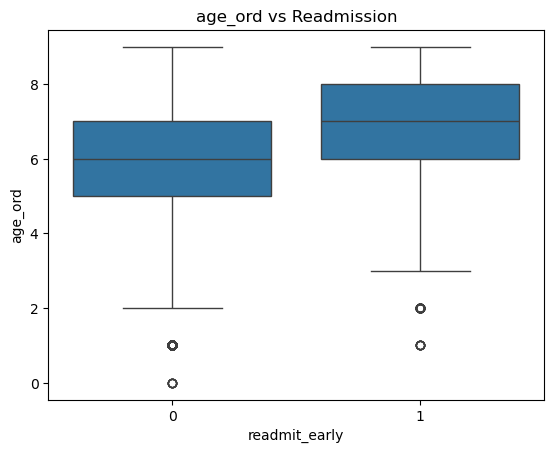

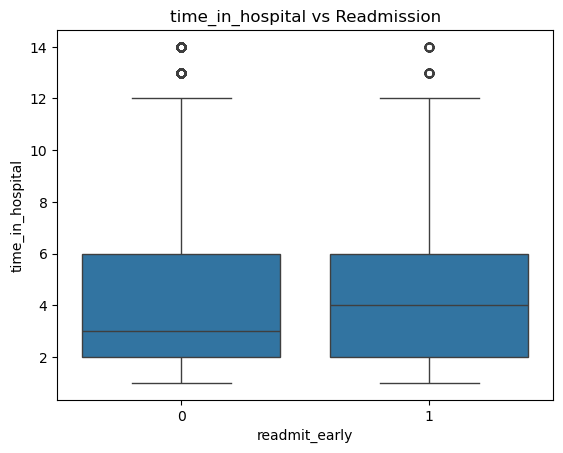

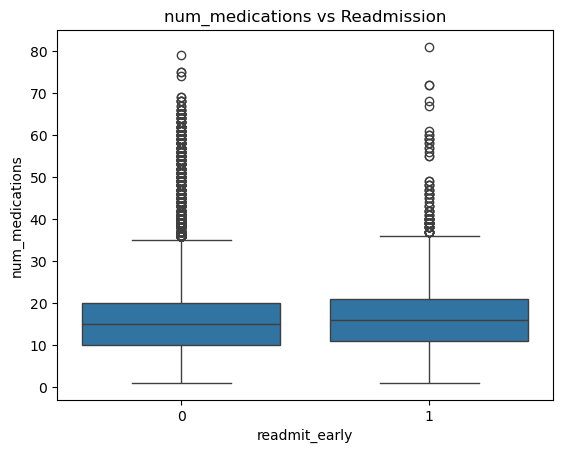

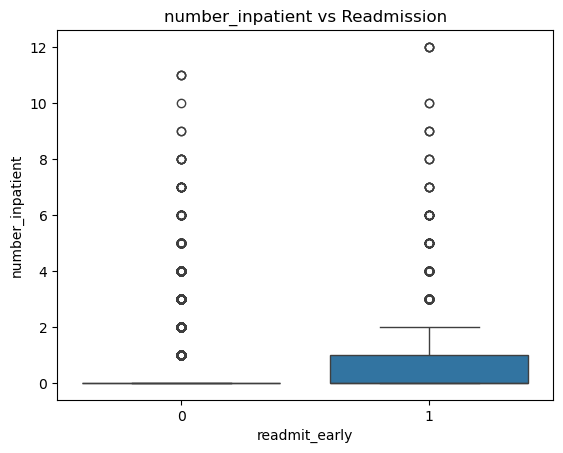

In [ ]:
# features vs log-odds
for col in ['age_ord','time_in_hospital','num_medications','number_inpatient']:
    sns.boxplot(x='readmit_early',y=col,data=df)
    plt.title(f'{col} vs Readmission')
    plt.show()

## Scaling Features

In [130]:
# Normalize features
from sklearn.preprocessing import StandardScaler

In [131]:
features_to_scale = [
    'age_ord', 'time_in_hospital', 'num_lab_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient',
    'number_diagnoses'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

## Encoding Categorical Columns

In [ ]:
df.select_dtypes(include='object')

,payer_code,medical_specialty,diag_1,diag_2,diag_3
0,MC,Other,821,276,285
1,MC,Other,Other,403,599
2,MC,Emergency/Trauma,532,428,535
3,MC,InternalMedicine,682,427,276
4,MC,Unknown,250.02,428,401
...,...,...,...,...,...
48135,MC,Unknown,Other,8,304
48136,MC,Unknown,435,784,250
48137,MC,Unknown,250.13,Other,458
48138,MC,Unknown,560,276,787


In [ ]:
categorical_cols = ['payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
for col in categorical_cols:
    df = wf.collapse_rare_categories(df, col)

In [ ]:
df_encoded.columns[df_encoded.columns.str.startswith('diag_')]

Index(['diag_1_162', 'diag_1_197', 'diag_1_198', 'diag_1_250', 'diag_1_250.02',
       'diag_1_250.1', 'diag_1_250.11', 'diag_1_250.12', 'diag_1_250.13',
       'diag_1_250.4',
       ...
       'diag_3_E849', 'diag_3_E878', 'diag_3_Other', 'diag_3_V10',
       'diag_3_V12', 'diag_3_V15', 'diag_3_V42', 'diag_3_V43', 'diag_3_V45',
       'diag_3_V58'],
      dtype='object', length=284)

In [167]:
df_encoded['diag_1_162']

0        False
1        False
2        False
3        False
4        False
         ...  
48135    False
48136    False
48137    False
48138    False
48139    False
Name: diag_1_162, Length: 48140, dtype: bool

In [168]:
dummy_cols = df_encoded.columns[df_encoded.dtypes == 'bool']

df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)

## Correlation

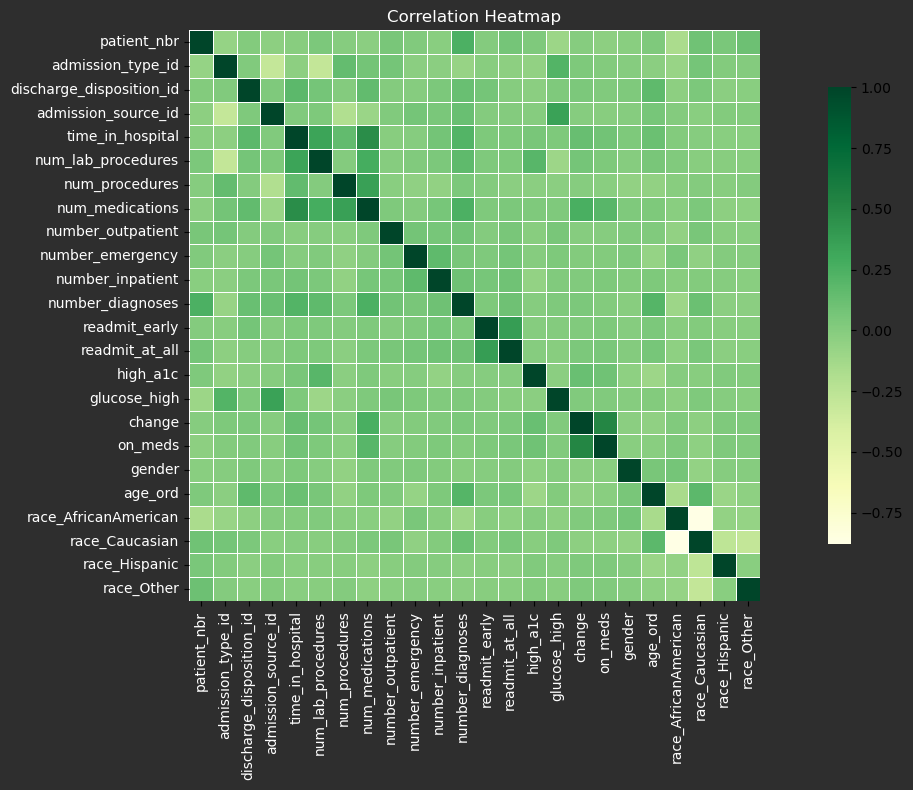

In [159]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Create the correlation matrix
corr = df_numeric.corr()

plt.figure(figsize=(14, 8), facecolor="#2e2e2e")

# Draw heatmap with green color map
sns.heatmap(
    corr,
    cmap="YlGn",                   # green color scheme
    annot=False,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
    xticklabels=True,
    yticklabels=True
)

# Improve label appearance
plt.xticks(rotation=90, color='white')
plt.yticks(rotation=0, color='white')
plt.title("Correlation Heatmap", color='white')
plt.gca().patch.set_facecolor('#2e2e2e')  # set axis background
plt.grid(False)

# Show
plt.tight_layout()
plt.show()


In [170]:
# Get numeric features
df_numeric = df.select_dtypes(include='number')

df_numeric.drop(['patient_nbr','admission_type_id','admission_source_id',
                 'discharge_disposition_id','readmit_early'
                 ],axis=1,inplace=True
                 )

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Extract correlations with the target
target = 'readmit_at_all'
corr_with_target = corr_matrix[target].drop(target)  # exclude self-correlation

# Sort by absolute correlation
corr_table = corr_with_target.reindex(corr_with_target.abs().sort_values(ascending=False).index)

corr_df = pd.DataFrame({
    'Feature': corr_table.index,
    'Correlation': corr_table.values,
    'AbsCorrelation': corr_table.abs().values
})


# Display
print(corr_df.to_string(index=False))

             Feature  Correlation  AbsCorrelation
    number_diagnoses     0.100887        0.100887
    number_inpatient     0.094070        0.094070
    number_emergency     0.069979        0.069979
             age_ord     0.060875        0.060875
   number_outpatient     0.059428        0.059428
             on_meds     0.051651        0.051651
      race_Caucasian     0.049902        0.049902
              change     0.038971        0.038971
     num_medications     0.038761        0.038761
race_AfricanAmerican    -0.038742        0.038742
  num_lab_procedures     0.038280        0.038280
    time_in_hospital     0.036561        0.036561
       race_Hispanic    -0.024821        0.024821
      num_procedures    -0.022897        0.022897
          race_Other    -0.016992        0.016992
        glucose_high    -0.010632        0.010632
              gender     0.006951        0.006951
            high_a1c     0.001505        0.001505


In [172]:
diag_cols = [col for col in df_encoded.columns if col.startswith('diag_')]

corr_diag = df_encoded[diag_cols + ['readmit_at_all']].corr()
corr_with_target = corr_diag['readmit_at_all'].drop('readmit_at_all')

corr_diag_sorted = corr_with_target.reindex(corr_with_target.abs().sort_values(ascending=False).index)

# Optional: format as a DataFrame for display
import pandas as pd

corr_diag_df = pd.DataFrame({
    'Feature': corr_diag_sorted.index,
    'Correlation': corr_diag_sorted.values,
    'AbsCorrelation': corr_diag_sorted.abs().values
})

print(corr_diag_df.to_string(index=False))

      Feature  Correlation  AbsCorrelation
   diag_1_428     0.054958        0.054958
   diag_3_250    -0.038016        0.038016
 diag_1_Other    -0.037473        0.037473
   diag_2_648    -0.036062        0.036062
   diag_1_278    -0.035914        0.035914
   diag_2_250    -0.035631        0.035631
   diag_2_401    -0.035441        0.035441
   diag_3_401    -0.031773        0.031773
   diag_2_428     0.029019        0.029019
   diag_1_491     0.027409        0.027409
   diag_2_491     0.025989        0.025989
   diag_2_585     0.025549        0.025549
   diag_3_403     0.024995        0.024995
   diag_2_403     0.024723        0.024723
   diag_3_427     0.024204        0.024204
   diag_1_493     0.024000        0.024000
   diag_2_707     0.023997        0.023997
   diag_3_496     0.022047        0.022047
   diag_3_428     0.021531        0.021531
   diag_3_682     0.021311        0.021311
   diag_3_585     0.020476        0.020476
   diag_1_540    -0.020205        0.020205
   diag_1_V

In [189]:
diag_cols_to_drop = corr_diag_df.sort_values(by='AbsCorrelation',ascending=False)['Feature'][50:].to_list()

In [190]:
df_encoded.drop(diag_cols_to_drop,axis=1,inplace=True)

In [191]:
df_encoded

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender,age_ord,race_AfricanAmerican,race_Caucasian,race_Hispanic,race_Other,payer_code_CM,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_OG,payer_code_Other,payer_code_SP,payer_code_UN,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Other,medical_specialty_Radiologist,medical_specialty_Surgery-General,medical_specialty_Unknown,diag_1_198,diag_1_250,diag_1_250.6,diag_1_250.82,diag_1_278,diag_1_404,diag_1_428,diag_1_440,diag_1_486,diag_1_491,diag_1_493,diag_1_540,diag_1_574,diag_1_722,diag_1_Other,diag_1_V58,diag_2_250,diag_2_250.02,diag_2_272,diag_2_305,diag_2_348,diag_2_401,diag_2_403,diag_2_427,diag_2_428,diag_2_491,diag_2_496,diag_2_518,diag_2_530,diag_2_585,diag_2_648,diag_2_682,diag_2_707,diag_2_Other,diag_3_250,diag_3_250.02,diag_3_250.6,diag_3_272,diag_3_280,diag_3_401,diag_3_403,diag_3_424,diag_3_427,diag_3_428,diag_3_496,diag_3_536,diag_3_585,diag_3_682,diag_3_707,diag_3_Other
0,20123568,1,22,7,0.962946,0.797493,2,-0.123201,-0.310277,-0.248788,-0.474576,0.767218,0,0,0,0,1,1,1,0.508428,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20377854,2,1,1,-0.420760,0.846804,3,-0.620416,-0.310277,-0.248788,-0.474576,-0.881346,0,0,0,0,0,1,1,-0.139541,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20408121,1,1,7,-0.074833,0.698871,1,-0.869023,-0.310277,-0.248788,-0.474576,-0.881346,0,0,0,0,0,1,1,1.804364,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20542797,1,2,7,2.000726,1.290605,1,0.249710,-0.310277,-0.248788,-0.474576,-0.881346,0,0,0,0,1,1,0,0.508428,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20514150,2,1,1,-0.074833,-0.435286,0,-0.620416,-0.310277,-0.248788,-0.474576,-1.980388,1,1,0,0,1,1,1,-0.139541,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48135,120975314,1,1,7,0.271093,1.685095,1,0.746924,-0.310277,1.251108,-0.474576,0.767218,0,0,0,0,1,1,1,1.156396,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48136,86472243,1,1,7,-1.112613,-2.013244,0,-0.123201,1.978175,-0.248788,-0.474576,-0.331825,0,0,0,0,1,1,0,1.156396,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48137,100162476,1,3,7,-0.420760,0.452315,0,0.001103,-0.310277,-0.248788,-0.474576,0.767218,0,1,1,0,1,1,0,0.508428,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48138,74694222,1,4,5,0.271093,-0.435286,3,0.249710,-0.310277,-0.248788,0.877585,0.767218,0,0,0,0,0,1,1,1.156396,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Saving DF

With the DF ready for modeling, let's move over to `R`.

In [141]:
df.head(3)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmit_early,readmit_at_all,high_a1c,glucose_high,change,on_meds,gender,age_ord,race_AfricanAmerican,race_Caucasian,race_Hispanic,race_Other
0,20123568,1,22,7,0.962946,MC,Other,0.797493,2,-0.123201,-0.310277,-0.248788,-0.474576,821,276,285,0.767218,0,0,0,0,1,1,1,0.508428,0,1,0,0
1,20377854,2,1,1,-0.420760,MC,Other,0.846804,3,-0.620416,-0.310277,-0.248788,-0.474576,Other,403,599,-0.881346,0,0,0,0,0,1,1,-0.139541,0,1,0,0
2,20408121,1,1,7,-0.074833,MC,Emergency/Trauma,0.698871,1,-0.869023,-0.310277,-0.248788,-0.474576,532,428,535,-0.881346,0,0,0,0,0,1,1,1.804364,0,1,0,0


In [144]:
df.to_csv('../data/RR2/modeling_data.csv',index=False)

In [193]:
df_encoded.to_csv('../data/RR2/modeling_data_encoded.csv',index=False)

In [ ]:
df_encoded['readmit_early']

# Modeling

In [133]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting on patient_nbr so we don't get repeat patients
unique_patients = df['patient_nbr'].drop_duplicates()
train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

In [135]:
train_df = df[df['patient_nbr'].isin(train_patients)]
test_df = df[df['patient_nbr'].isin(test_patients)]

# IDs

In [96]:
ids.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [111]:
ids[:60]

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [118]:
def parse_stacked_mapping(raw_ids):
    # Find header row indices
    header_rows = raw_ids[raw_ids[1] == 'description'].index.tolist()
    header_rows.append(len(raw_ids))  # Add end for slicing

    mappings = {}

    # Iterate over blocks
    for i in range(len(header_rows) - 1):
        start = header_rows[i] + 1
        end = header_rows[i+1]

        var_name = raw_ids.iloc[header_rows[i], 0]  # e.g. 'admission_type_id'
        sub_df = raw_ids.iloc[start:end].dropna()

        # Rename columns
        sub_df.columns = ['code', 'description']
        sub_df = sub_df.astype({'code': int})  # convert code from float to int
        mappings[var_name] = dict(zip(sub_df['code'], sub_df['description']))

    return mappings

In [119]:
# Parse it into a dict of dicts
id_maps = parse_stacked_mapping(ids)

In [122]:
# Now you can map like:
df['admission_type'] = df['admission_type_id'].map(id_maps['admission_type_id'])
df['discharge_disposition'] = df['discharge_disposition_id'].map(id_maps['discharge_disposition_id'])
df['admission_source'] = df['admission_source_id'].map(id_maps['admission_source_id'])

In [145]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_early,readmit_at_all,admission_type,discharge_disposition,admission_source
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,Other,58,2,15,0,0,0,821,276,285,9,None,None,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,0,Emergency,Discharged/transferred to another rehab fac including rehab units of a hospital .,Emergency Room
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,Other,59,3,11,0,0,0,V56,403,599,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,0,0,Urgent,Discharged to home,Physician Referral
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,1,9,0,0,0,532,428,535,6,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,0,Emergency,Discharged to home,Emergency Room
